reference : https://github.com/search?q=lstm%20autoencoder&type=repositories

Epoch 1/25
1/1 - 3s - loss: 0.4313 - 3s/epoch - 3s/step
Epoch 2/25
1/1 - 0s - loss: 0.4313 - 496ms/epoch - 496ms/step
Epoch 3/25
1/1 - 0s - loss: 0.4313 - 490ms/epoch - 490ms/step
Epoch 4/25
1/1 - 1s - loss: 0.4313 - 510ms/epoch - 510ms/step
Epoch 5/25
1/1 - 0s - loss: 0.4313 - 495ms/epoch - 495ms/step
Epoch 6/25
1/1 - 1s - loss: 0.4312 - 509ms/epoch - 509ms/step
Epoch 7/25
1/1 - 0s - loss: 0.4313 - 489ms/epoch - 489ms/step
Epoch 8/25
1/1 - 1s - loss: 0.4313 - 521ms/epoch - 521ms/step
Epoch 9/25
1/1 - 0s - loss: 0.4313 - 488ms/epoch - 488ms/step
Epoch 10/25
1/1 - 1s - loss: 0.4313 - 514ms/epoch - 514ms/step
Epoch 11/25
1/1 - 0s - loss: 0.4313 - 490ms/epoch - 490ms/step
Epoch 12/25
1/1 - 1s - loss: 0.4313 - 958ms/epoch - 958ms/step
Epoch 13/25
1/1 - 1s - loss: 0.4313 - 995ms/epoch - 995ms/step
Epoch 14/25
1/1 - 1s - loss: 0.4313 - 1s/epoch - 1s/step
Epoch 15/25
1/1 - 1s - loss: 0.4312 - 944ms/epoch - 944ms/step
Epoch 16/25
1/1 - 1s - loss: 0.4313 - 729ms/epoch - 729ms/step
Epoch 17/25
1

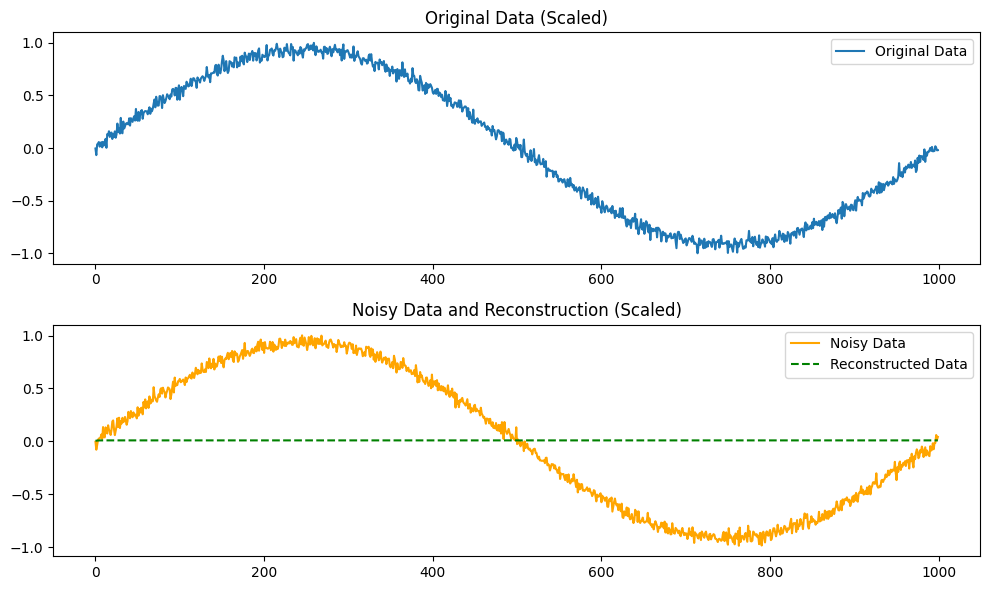

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# 데이터 생성
def generate_data(num_points, slope, intercept, noise_std):
    x = np.linspace(0, 2 * np.pi, num_points)
    y = np.sin(x) * slope + intercept + np.random.normal(0, noise_std, size=num_points)
    return y

# 데이터 파라미터 설정
num_points = 1000
slope = 5
intercept = 1
noise_std = 0.2

# 데이터 생성
original_data = generate_data(num_points, slope, intercept, noise_std)

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(-1, 1))
original_data_scaled = scaler.fit_transform(original_data.reshape(-1, 1)).reshape(-1)

# LSTM Autoencoder 모델 정의
model = Sequential([
    LSTM(50, activation='relu', input_shape=(num_points, 1)),
    RepeatVector(num_points),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')

# 데이터 전처리
X = original_data_scaled.reshape((1, num_points, 1))
y = original_data_scaled.reshape((1, num_points, 1))

# 모델 학습
model.fit(X, y, epochs=25, verbose=2)

# 테스트 데이터 생성
test_data = generate_data(num_points, slope, intercept, noise_std)

# 테스트 데이터 스케일링
test_data_scaled = scaler.transform(test_data.reshape(-1, 1)).reshape(-1)

# 테스트 데이터 전처리
X_test = test_data_scaled.reshape((1, num_points, 1))

# 예측
reconstructed_data_scaled = model.predict(X_test)

# 시각화
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(original_data_scaled, label='Original Data')
plt.title('Original Data (Scaled)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test_data_scaled, label='Noisy Data', color='orange')
plt.plot(reconstructed_data_scaled.reshape((num_points,)), label='Reconstructed Data', linestyle='--', color='green')
plt.title('Noisy Data and Reconstruction (Scaled)')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/25
1/1 - 5s - loss: 3.2143 - 5s/epoch - 5s/step
Epoch 2/25
1/1 - 1s - loss: 3.1634 - 954ms/epoch - 954ms/step
Epoch 3/25
1/1 - 1s - loss: 3.1135 - 951ms/epoch - 951ms/step
Epoch 4/25
1/1 - 1s - loss: 3.0597 - 918ms/epoch - 918ms/step
Epoch 5/25
1/1 - 1s - loss: 3.0060 - 609ms/epoch - 609ms/step
Epoch 6/25
1/1 - 1s - loss: 2.9544 - 541ms/epoch - 541ms/step
Epoch 7/25
1/1 - 1s - loss: 2.9021 - 518ms/epoch - 518ms/step
Epoch 8/25
1/1 - 1s - loss: 2.8513 - 538ms/epoch - 538ms/step
Epoch 9/25
1/1 - 1s - loss: 2.7988 - 509ms/epoch - 509ms/step
Epoch 10/25
1/1 - 1s - loss: 2.7429 - 518ms/epoch - 518ms/step
Epoch 11/25
1/1 - 1s - loss: 2.6829 - 547ms/epoch - 547ms/step
Epoch 12/25
1/1 - 1s - loss: 2.6192 - 507ms/epoch - 507ms/step
Epoch 13/25
1/1 - 0s - loss: 2.5506 - 496ms/epoch - 496ms/step
Epoch 14/25
1/1 - 0s - loss: 2.4792 - 491ms/epoch - 491ms/step
Epoch 15/25
1/1 - 1s - loss: 2.4086 - 508ms/epoch - 508ms/step
Epoch 16/25
1/1 - 1s - loss: nan - 561ms/epoch - 561ms/step
Epoch 17/2

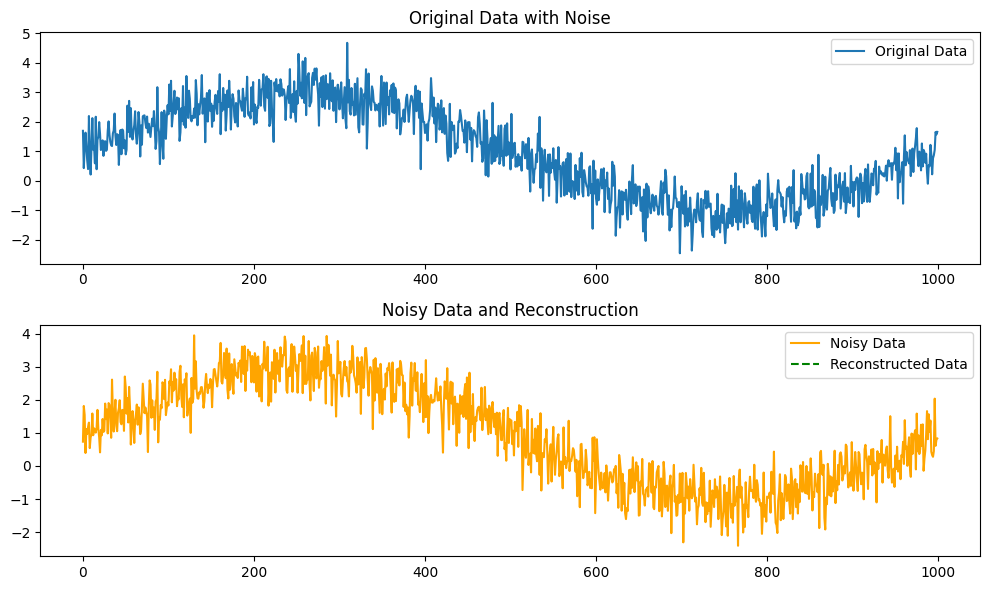

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# 데이터 생성 (sin 함수에 slope noise와 Gaussian noise 추가)
def generate_data(num_points, slope, intercept, noise_std_slope, noise_std_gaussian):
    x = np.linspace(0, 2 * np.pi, num_points)
    y = np.sin(x) * slope + intercept + np.random.normal(0, noise_std_slope, size=num_points)
    y = y + np.random.normal(0, noise_std_gaussian, size=num_points)
    return y

# 데이터 파라미터 설정
num_points = 1000
slope = 2
intercept = 1
noise_std_slope = 0.5
noise_std_gaussian = 0.2

# 데이터 생성
original_data = generate_data(num_points, slope, intercept, noise_std_slope, noise_std_gaussian)

# LSTM Autoencoder 모델 정의
model = Sequential([
    LSTM(50, activation='relu', input_shape=(num_points, 1)),
    RepeatVector(num_points),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')

# 데이터 전처리
X = original_data.reshape((1, num_points, 1))
y = original_data.reshape((1, num_points, 1))

# 모델 학습
model.fit(X, y, epochs=25, verbose=2)

# 테스트 데이터 생성
test_data = generate_data(num_points, slope, intercept, noise_std_slope, noise_std_gaussian)

# 테스트 데이터 전처리
X_test = test_data.reshape((1, num_points, 1))

# 예측
reconstructed_data = model.predict(X_test)

# 시각화
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(original_data, label='Original Data')
plt.title('Original Data with Noise')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test_data, label='Noisy Data', color='orange')
plt.plot(reconstructed_data.reshape((num_points,)), label='Reconstructed Data', linestyle='--', color='green')
plt.title('Noisy Data and Reconstruction')
plt.legend()

plt.tight_layout()
plt.show()
